In [1]:
import duckdb
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

import numpy as np
import os
import dask.dataframe as dd
sns.set_style("whitegrid")

In [2]:
con = duckdb.connect(database='/d/hpc/projects/FRI/bigdata/students/in7357/DUCKDB/taxi_analysis.db')

In [3]:
con.execute("""
             CREATE TABLE IF NOT EXISTS yellow_taxi AS
             SELECT *
             FROM read_parquet('/d/hpc/projects/FRI/bigdata/students/in7357/cleaned_parquet/YELLOW/*/*.parquet')
             """)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [3]:
con.execute("""
             CREATE TABLE IF NOT EXISTS green_taxi AS
             SELECT *
             FROM read_parquet('/d/hpc/projects/FRI/bigdata/students/in7357/cleaned_parquet/GREEN/*/*.parquet')
             """)

In [5]:
con.execute("""
             CREATE TABLE IF NOT EXISTS green_taxi AS
             SELECT *
             FROM read_parquet('/d/hpc/projects/FRI/bigdata/students/in7357/cleaned_parquet/GREEN/*/*.parquet')
             """)

In [9]:
con.execute("""
             CREATE TABLE IF NOT EXISTS fhv_taxi AS
             SELECT *
             FROM read_parquet('/d/hpc/projects/FRI/bigdata/students/in7357/cleaned_parquet/FHV/*/*.parquet')
             """)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [3]:
con2 = duckdb.connect(database='/d/hpc/projects/FRI/bigdata/students/in7357/DUCKDB/taxi_analysis_uber.db')

In [6]:
con2.execute("""
             CREATE TABLE IF NOT EXISTS fhvhv_taxi AS
             SELECT *
             FROM read_parquet('/d/hpc/projects/FRI/bigdata/students/in7357/cleaned_parquet/FHVHV/*/*.parquet')
             """)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [9]:
con2.execute("""
    SELECT *
    FROM fhvhv_taxi USING SAMPLE reservoir(10 ROWS)
    """).df()

,vendorid,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,bcf,sales_tax,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,year
0,None,2019-02-23 12:30:20,2019-02-23 13:00:19,None,None,None,None,7.0,107.0,None,...,0.17,0.61,0.0,12.16,Y,Y,N,N,None,2019
1,None,2019-02-23 12:43:50,2019-02-23 12:56:25,None,None,None,None,157.0,226.0,None,...,0.26,0.94,0.0,8.52,N,N,N,N,None,2019
2,None,2019-02-23 12:36:39,2019-02-23 12:49:21,None,None,None,None,79.0,112.0,None,...,0.00,0.57,0.0,0.00,Y,N,N,N,None,2019
3,None,2019-02-23 12:20:00,2019-02-23 12:55:41,None,None,None,None,238.0,255.0,None,...,0.00,1.19,0.0,0.00,Y,Y,N,N,None,2019
4,None,2019-02-23 12:36:14,2019-02-23 13:06:40,None,None,None,None,135.0,132.0,None,...,0.38,1.33,0.0,0.00,Y,N,N,N,None,2019
5,None,2019-02-23 12:04:36,2019-02-23 12:11:03,None,None,None,None,68.0,246.0,None,...,0.18,0.64,2.0,5.39,N,N,N,N,None,2019
6,None,2019-02-23 12:34:00,2019-02-23 12:48:08,None,None,None,None,137.0,114.0,None,...,0.10,0.37,0.0,5.00,Y,Y,N,N,None,2019
7,None,2019-02-23 12:58:00,2019-02-23 13:07:36,None,None,None,None,74.0,41.0,None,...,0.18,0.62,2.0,6.32,N,N,N,N,None,2019
8,None,2019-02-23 12:17:50,2019-02-23 12:27:21,None,None,None,None,231.0,68.0,None,...,0.26,0.97,0.0,7.50,N,N,N,N,None,2019
9,None,2019-02-23 13:08:11,2019-02-23 13:39:42,None,None,None,None,129.0,76.0,None,...,0.59,2.10,0.0,29.01,N,N,N,N,None,2019


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

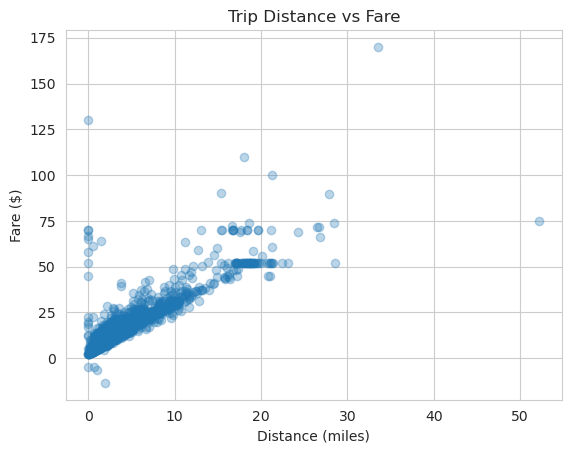

In [8]:
sample = con.execute("""
    SELECT trip_distance, fare_amount
    FROM yellow_taxi USING SAMPLE reservoir(3000 ROWS)
""").df()
plt.scatter(sample['trip_distance'], sample['fare_amount'], alpha=0.3)
plt.title('Trip Distance vs Fare')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare ($)')
plt.show()

In [4]:
hourly_pickup_yellow = con.execute("""
    SELECT EXTRACT(hour FROM pickup_datetime) AS hour,
           COUNT(*) AS trips
    FROM yellow_taxi
    GROUP BY hour
    ORDER BY hour
""").df()
# hourly_pickup.plot(x='hour', y='trips', kind='bar')
# plt.title('Trips by Pickup Hour')
# plt.xlabel('Hour of Day')

# plt.ylabel('Number of Trips')
# plt.show()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [5]:
hourly_pickup_green = con.execute("""
    SELECT EXTRACT(hour FROM pickup_datetime) AS hour,
           COUNT(*) AS trips
    FROM green_taxi
    GROUP BY hour
    ORDER BY hour
""").df()


# hourly_pickup.plot(x='hour', y='trips', kind='bar')
# plt.title('Trips by Pickup Hour')
# plt.xlabel('Hour of Day')
# plt.ylabel('Number of Trips')
# plt.show()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [6]:

hourly_pickup_fhv = con.execute("""
    SELECT EXTRACT(hour FROM pickup_datetime) AS hour,
           COUNT(*) AS trips
    FROM fhv_taxi
    GROUP BY hour
    ORDER BY hour
""").df()

hourly_pickup_fhvhv = con2.execute("""
    SELECT EXTRACT(hour FROM pickup_datetime) AS hour,
           COUNT(*) AS trips
    FROM fhvhv_taxi
    GROUP BY hour
    ORDER BY hour
""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [7]:
pickup_uber = con2.execute("""
    SELECT pickup_datetime
    FROM fhvhv_taxi
    """).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

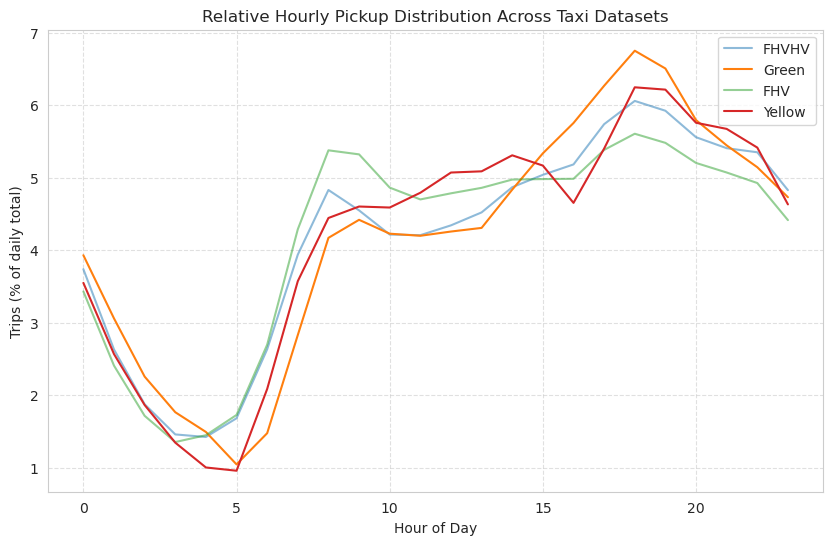

In [14]:
def normalize(df):
    df["pct"] = df["trips"] / df["trips"].sum() * 100
    return df

# plt.figure(figsize=(10,6))


# Normalize each dataset
hourly_pickup_fhvhv = normalize(hourly_pickup_fhvhv)
hourly_pickup_green = normalize(hourly_pickup_green)
hourly_pickup_fhv   = normalize(hourly_pickup_fhv)
hourly_pickup_yellow= normalize(hourly_pickup_yellow)

plt.figure(figsize=(10,6))
plt.plot(hourly_pickup_fhvhv['hour'], hourly_pickup_fhvhv['pct'], label='FHVHV', alpha=0.5)
plt.plot(hourly_pickup_green['hour'], hourly_pickup_green['pct'], label='Green')
plt.plot(hourly_pickup_fhv['hour'], hourly_pickup_fhv['pct'], label='FHV', alpha=0.5)
plt.plot(hourly_pickup_yellow['hour'], hourly_pickup_yellow['pct'], label='Yellow')

plt.xlabel("Hour of Day")
plt.ylabel("Trips (% of daily total)")
plt.title("Relative Hourly Pickup Distribution Across Taxi Datasets")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('/d/hpc/projects/FRI/bigdata/students/in7357/plots/hourly_relative.pdf',
            format="pdf", bbox_inches="tight")

plt.show()

In [10]:
pickup_dow_fhvhv = con2.execute("""
    SELECT EXTRACT(dow FROM pickup_datetime) AS dow,
           COUNT(*) AS trips
    FROM fhvhv_taxi
    GROUP BY dow
    ORDER BY dow
""").df()

print("Processed uber")

pickup_dow_fhv = con.execute("""
    SELECT EXTRACT(dow FROM pickup_datetime) AS dow,
           COUNT(*) AS trips
    FROM fhv_taxi
    GROUP BY dow
    ORDER BY dow
""").df()


pickup_dow_green = con.execute("""
    SELECT EXTRACT(dow FROM pickup_datetime) AS dow,
           COUNT(*) AS trips
    FROM green_taxi
    GROUP BY dow
    ORDER BY dow
""").df()


pickup_dow_yellow = con.execute("""
    SELECT EXTRACT(dow FROM pickup_datetime) AS dow,
           COUNT(*) AS trips
    FROM yellow_taxi
    GROUP BY dow
    ORDER BY dow
""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Processed uber


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

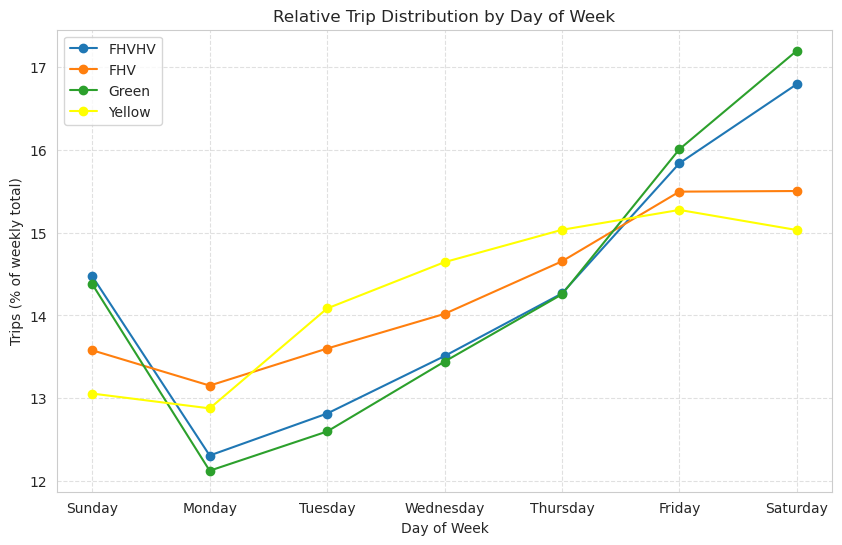

In [13]:
def normalize(df):
    df["pct"] = df["trips"] / df["trips"].sum() * 100
    return df

pickup_dow_fhvhv = normalize(pickup_dow_fhvhv)
pickup_dow_fhv   = normalize(pickup_dow_fhv)
pickup_dow_green = normalize(pickup_dow_green)
pickup_dow_yellow= normalize(pickup_dow_yellow)

dow_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Add labels
pickup_dow_fhvhv["dow"] = pickup_dow_fhvhv["dow"].astype(int)
pickup_dow_fhv["dow"] = pickup_dow_fhv["dow"].astype(int)
pickup_dow_green["dow"] = pickup_dow_green["dow"].astype(int)
pickup_dow_yellow["dow"] = pickup_dow_yellow["dow"].astype(int)

pickup_dow_fhvhv["day"] = pickup_dow_fhvhv["dow"].map(dict(enumerate(dow_labels)))
pickup_dow_fhv["day"] = pickup_dow_fhv["dow"].map(dict(enumerate(dow_labels)))
pickup_dow_green["day"] = pickup_dow_green["dow"].map(dict(enumerate(dow_labels)))
pickup_dow_yellow["day"] = pickup_dow_yellow["dow"].map(dict(enumerate(dow_labels)))


plt.figure(figsize=(10,6))
plt.plot(pickup_dow_fhvhv["day"], pickup_dow_fhvhv["pct"], marker="o", label="FHVHV")
plt.plot(pickup_dow_fhv["day"], pickup_dow_fhv["pct"], marker="o", label="FHV")
plt.plot(pickup_dow_green["day"], pickup_dow_green["pct"], marker="o", label="Green")
plt.plot(pickup_dow_yellow["day"], pickup_dow_yellow["pct"], marker="o", label="Yellow", color='yellow')

plt.title("Relative Trip Distribution by Day of Week")
plt.ylabel("Trips (% of weekly total)")
plt.xlabel("Day of Week")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('/d/hpc/projects/FRI/bigdata/students/in7357/plots/weekly_realtive.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [16]:
pickup_year_fhvhv = con2.execute("""
    SELECT EXTRACT(year FROM pickup_datetime) AS year,
           COUNT(*) AS trips
    FROM fhvhv_taxi
    GROUP BY EXTRACT(year FROM pickup_datetime)
    ORDER BY year
""").df()

pickup_year_fhv = con.execute("""
    SELECT EXTRACT(year FROM pickup_datetime) AS year,
           COUNT(*) AS trips
    FROM fhv_taxi
    GROUP BY EXTRACT(year FROM pickup_datetime)
    ORDER BY year
""").df()

pickup_year_green = con.execute("""
    SELECT EXTRACT(year FROM pickup_datetime) AS year,
           COUNT(*) AS trips
    FROM green_taxi
    GROUP BY EXTRACT(year FROM pickup_datetime)
    ORDER BY year
""").df()

pickup_year_yellow = con.execute("""
    SELECT EXTRACT(year FROM pickup_datetime) AS year,
           COUNT(*) AS trips
    FROM yellow_taxi
    GROUP BY EXTRACT(year FROM pickup_datetime)
    ORDER BY year
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [21]:
mask_yellow = (pickup_year_yellow['year'] >= 2012) & (pickup_year_yellow['year'] <= 2025)
mask_green = (pickup_year_green['year'] >= 2014) & (pickup_year_green['year'] <= 2025)
mask_fhv = (pickup_year_fhv['year'] >= 2015) & (pickup_year_fhv['year'] <= 2025)
mask_fhvhv = (pickup_year_fhvhv['year'] >= 2019) & (pickup_year_fhvhv['year'] <= 2025)

pickup_year_yellow = pickup_year_yellow[mask_yellow]
pickup_year_green  = pickup_year_green[mask_green]
pickup_year_fhv    = pickup_year_fhv[mask_fhv]
pickup_year_fhvhv  = pickup_year_fhvhv[mask_fhvhv]

In [22]:
pickup_year_fhvhv["dataset"] = "FHVHV"
pickup_year_fhv["dataset"]   = "FHV"
pickup_year_green["dataset"] = "Green"
pickup_year_yellow["dataset"]= "Yellow"

all_years = pd.concat([
    pickup_year_fhvhv,
    pickup_year_fhv,
    pickup_year_green,
    pickup_year_yellow
])

/tmp/ipykernel_1940002/1957595748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_year_yellow["dataset"]= "Yellow"


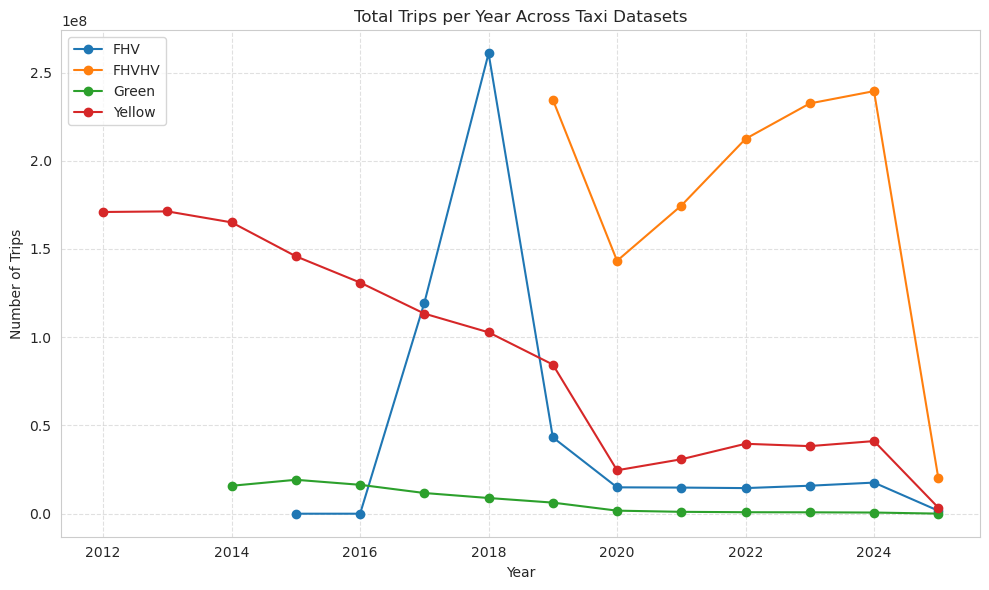

In [26]:
plt.figure(figsize=(10,6))
for name, subset in all_years.groupby("dataset"):
    plt.plot(subset["year"], subset["trips"], marker="o", label=name)

plt.title("Total Trips per Year Across Taxi Datasets")
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig('/d/hpc/projects/FRI/bigdata/students/in7357/plots/yearly.pdf', format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_1940002/404071013.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_year_yellow["dataset"]= "Yellow"


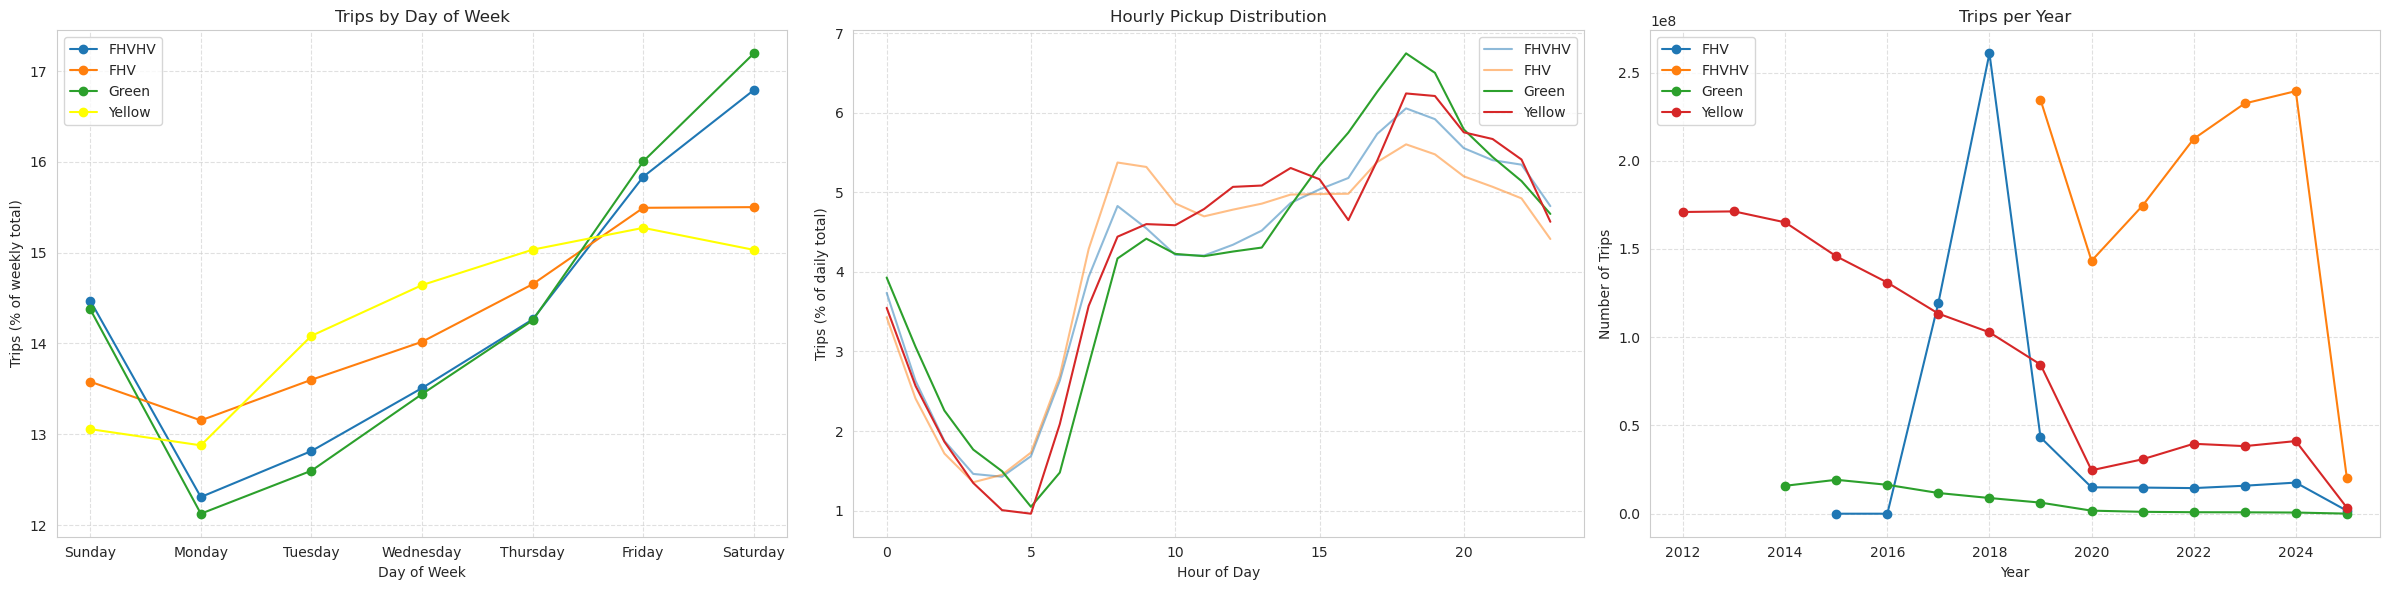

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

def normalize(df):
    df["pct"] = df["trips"] / df["trips"].sum() * 100
    return df

dow_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Normalize and label DOW datasets
for df in [pickup_dow_fhvhv, pickup_dow_fhv, pickup_dow_green, pickup_dow_yellow]:
    normalize(df)
    df["dow"] = df["dow"].astype(int)
    df["day"] = df["dow"].map(dict(enumerate(dow_labels)))

# Normalize hourly datasets
for df in [hourly_pickup_fhvhv, hourly_pickup_fhv, hourly_pickup_green, hourly_pickup_yellow]:
    normalize(df)

# Add dataset labels for yearly datasets and combine
pickup_year_fhvhv["dataset"] = "FHVHV"
pickup_year_fhv["dataset"]   = "FHV"
pickup_year_green["dataset"] = "Green"
pickup_year_yellow["dataset"]= "Yellow"
all_years = pd.concat([pickup_year_fhvhv, pickup_year_fhv, pickup_year_green, pickup_year_yellow])

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# --- Weekly distribution ---
axes[0].plot(pickup_dow_fhvhv["day"], pickup_dow_fhvhv["pct"], marker="o", label="FHVHV")
axes[0].plot(pickup_dow_fhv["day"], pickup_dow_fhv["pct"], marker="o", label="FHV")
axes[0].plot(pickup_dow_green["day"], pickup_dow_green["pct"], marker="o", label="Green")
axes[0].plot(pickup_dow_yellow["day"], pickup_dow_yellow["pct"], marker="o", label="Yellow", color='yellow')
axes[0].set_title("Trips by Day of Week")
axes[0].set_xlabel("Day of Week")
axes[0].set_ylabel("Trips (% of weekly total)")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# --- Hourly distribution ---
axes[1].plot(hourly_pickup_fhvhv['hour'], hourly_pickup_fhvhv['pct'], label='FHVHV', alpha=0.5)
axes[1].plot(hourly_pickup_fhv['hour'], hourly_pickup_fhv['pct'], label='FHV', alpha=0.5)
axes[1].plot(hourly_pickup_green['hour'], hourly_pickup_green['pct'], label='Green')
axes[1].plot(hourly_pickup_yellow['hour'], hourly_pickup_yellow['pct'], label='Yellow')
axes[1].set_title("Hourly Pickup Distribution")
axes[1].set_xlabel("Hour of Day")
axes[1].set_ylabel("Trips (% of daily total)")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# --- Yearly trips ---
for name, subset in all_years.groupby("dataset"):
    axes[2].plot(subset["year"], subset["trips"], marker="o", label=name)
axes[2].set_title("Trips per Year")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Number of Trips")
axes[2].legend()
axes[2].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig('/d/hpc/projects/FRI/bigdata/students/in7357/plots/combined_trips.pdf', format="pdf", bbox_inches="tight")
plt.show()


## Spatial features

In [27]:
import geopandas as gpd
import os

extract_dir = "/d/hpc/projects/FRI/bigdata/students/in7357/taxi_zones_shapefile"

shp_file = [f for f in os.listdir(extract_dir) if f.endswith(".shp")][0]
gdf = gpd.read_file(os.path.join(extract_dir, shp_file)).to_crs("EPSG:4326")

# Compute centroids
gdf["latitude"] = gdf.centroid.y
gdf["longitude"] = gdf.centroid.x
zone_coords = gdf[["LocationID", "latitude", "longitude"]].copy()

/tmp/ipykernel_1940002/3776722750.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["latitude"] = gdf.centroid.y
/tmp/ipykernel_1940002/3776722750.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["longitude"] = gdf.centroid.x


In [28]:
zone_coords

,LocationID,latitude,longitude
0,1,40.691831,-74.174000
1,2,40.616745,-73.831299
2,3,40.864473,-73.847422
3,4,40.723752,-73.976968
4,5,40.552659,-74.188485
...,...,...,...
258,259,40.897932,-73.852215
259,260,40.744234,-73.906306
260,261,40.709139,-74.013023
261,262,40.775932,-73.946510


In [29]:
len(gdf)

263

In [57]:
trips_by_pickup_yellow = con.execute("""
SELECT 
    pulocationid,
    COUNT(*) AS num_trips,
    AVG(fare_amount) AS avg_fare,
    AVG(trip_distance) AS avg_dist,
    AVG(tip_amount) AS avg_tip,
    AVG(total_amount) AS avg_total,
FROM yellow_taxi
GROUP BY pulocationid
ORDER BY num_trips DESC;
""").df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [31]:
trips_by_pickup_yellow

,pulocationid,num_trips,avg_fare,avg_dist,avg_tip,avg_total
0,237.0,49266239,9.780586,4.466978,1.357688,12.868130
1,161.0,46158024,11.812067,5.253195,1.697621,15.448503
2,236.0,44362077,10.237352,3.723642,1.439016,13.406275
3,162.0,42258125,8.467020,5.451863,4.874692,15.212380
4,230.0,41107205,13.002757,5.770359,1.685042,16.697041
...,...,...,...,...,...,...
260,176.0,570,35.057684,6.549860,4.142526,42.563649
261,204.0,498,54.844277,10.036285,4.193956,63.018976
262,110.0,212,12.393821,3.234717,1.036840,14.602594
263,104.0,76,12.983553,2.958421,1.926579,16.181974


In [32]:
pickup_merged_yellow = (
    trips_by_pickup_yellow
    .merge(gdf, left_on="pulocationid", right_on="LocationID", how="left")
)

In [33]:
pickup_merged_yellow

,pulocationid,num_trips,avg_fare,avg_dist,avg_tip,avg_total,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,latitude,longitude
0,237.0,49266239,9.780586,4.466978,1.357688,12.868130,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((-73.96613 40.76218, -73.96658 40.761...",40.768615,-73.965634
1,161.0,46158024,11.812067,5.253195,1.697621,15.448503,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((-73.97534 40.7553, -73.97581 40.7546...",40.758027,-73.977698
2,236.0,44362077,10.237352,3.723642,1.439016,13.406275,236.0,0.044252,0.000103,Upper East Side North,236.0,Manhattan,"POLYGON ((-73.95779 40.7736, -73.95826 40.7729...",40.780436,-73.957011
3,162.0,42258125,8.467020,5.451863,4.874692,15.212380,162.0,0.035270,0.000048,Midtown East,162.0,Manhattan,"POLYGON ((-73.97122 40.75519, -73.97168 40.754...",40.756687,-73.972356
4,230.0,41107205,13.002757,5.770359,1.685042,16.697041,230.0,0.031028,0.000056,Times Sq/Theatre District,230.0,Manhattan,"POLYGON ((-73.98362 40.75552, -73.98412 40.754...",40.759817,-73.984196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,110.0,212,12.393821,3.234717,1.036840,14.602594,110.0,0.103946,0.000526,Great Kills Park,110.0,Staten Island,"POLYGON ((-74.11814 40.55059, -74.11656 40.549...",40.545780,-74.128343
264,104.0,76,12.983553,2.958421,1.926579,16.181974,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
265,103.0,33,12.878788,3.769697,1.362727,15.690909,103.0,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103.0,Manhattan,"POLYGON ((-74.04389 40.69018, -74.04351 40.689...",40.689860,-74.045288
266,103.0,33,12.878788,3.769697,1.362727,15.690909,104.0,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103.0,Manhattan,"POLYGON ((-74.03995 40.70089, -74.03945 40.700...",40.698768,-74.040771


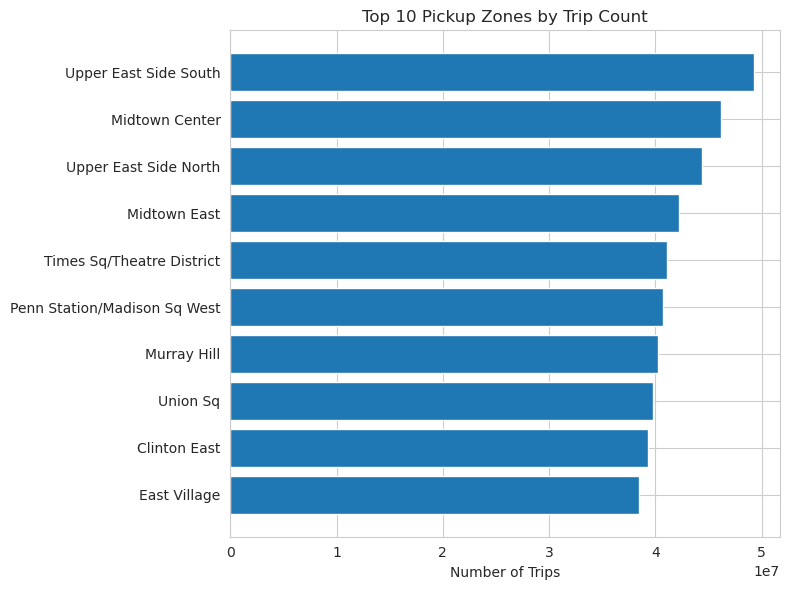

In [35]:

def plot_top10(df, count_col, label_col, title):
    top10 = df.nlargest(10, count_col)
    plt.figure(figsize=(8,6))
    plt.barh(top10[label_col], top10[count_col])
    plt.gca().invert_yaxis()
    plt.xlabel("Number of Trips")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_top10(pickup_merged_yellow, "num_trips", "zone", "Top 10 Pickup Zones by Trip Count")
# plot_top10(dropoff_merged, "num_trips", "zone", "Top 10 Drop‑off Zones by Trip Count")

In [38]:
def merge_zones(df):
    return df.merge(gdf, left_on="locationid", right_on="LocationID", how="left")


In [37]:
def get_trips(con, table, loc_col="pulocationid", numeric_cols=None):
    """
    Compute number of trips and optional averages for given numeric columns if they exist.
    """
    if numeric_cols is None:
        numeric_cols = []
    
    # Only include AVG(...) for columns that exist
    avg_cols = ", ".join([f"AVG({c}) AS avg_{c}" for c in numeric_cols])
    if avg_cols:
        avg_cols = ", " + avg_cols
    
    query = f"""
        SELECT {loc_col} AS locationid,
               COUNT(*) AS num_trips
               {avg_cols}
        FROM {table}
        GROUP BY {loc_col}
        ORDER BY num_trips DESC
    """
    return con.execute(query).df()

# Example: pickup stats for each dataset
# Yellow and Green have fare, tip, total_amount, distance
trips_yellow = get_trips(con, "yellow_taxi", "pulocationid",
                         numeric_cols=["fare_amount", "tip_amount", "total_amount", "trip_distance"])
trips_green  = get_trips(con, "green_taxi", "pulocationid",
                         numeric_cols=["fare_amount", "tip_amount", "total_amount", "trip_distance"])

# FHV and FHVHV only have number of trips
trips_fhv    = get_trips(con, "fhv_taxi", "pulocationid", numeric_cols=[])
trips_fhvhv  = get_trips(con2, "fhvhv_taxi", "pulocationid", numeric_cols=[])



FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [39]:

pickup_yellow = merge_zones(trips_yellow)
pickup_green  = merge_zones(trips_green)
pickup_fhv    = merge_zones(trips_fhv)
pickup_fhvhv  = merge_zones(trips_fhvhv)

In [75]:
def plot_top10(df, count_col, label_col, title):
    top10 = df.nlargest(10, count_col)
    plt.figure(figsize=(8,6))
    plt.barh(top10[label_col], top10[count_col])
    plt.gca().invert_yaxis()
    plt.xlabel("Number of Trips")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f'/d/hpc/projects/FRI/bigdata/students/in7357/plots/{title}.pdf')
    plt.show()



In [52]:
pickup_fhv = pickup_fhv.dropna(subset=["locationid", "OBJECTID"]).reset_index(drop=True)
pickup_fhvhv = pickup_fhvhv.dropna(subset=["locationid", "OBJECTID"]).reset_index(drop=True)
pickup_yellow = pickup_yellow.dropna(subset=["locationid", "OBJECTID"]).reset_index(drop=True)
pickup_green = pickup_green.dropna(subset=["locationid", "OBJECTID"]).reset_index(drop=True)


In [53]:
pickup_fhv

,locationid,num_trips,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,latitude,longitude
0,79.0,6089089,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((-73.98378 40.72154, -73.98382 40.721...",40.727620,-73.985937
1,132.0,5650513,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((-73.82503 40.66358, -73.82486 ...",40.646984,-73.786533
2,161.0,5636072,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((-73.97534 40.7553, -73.97581 40.7546...",40.758027,-73.977698
3,48.0,5279062,48.0,0.043747,0.000094,Clinton East,48.0,Manhattan,"POLYGON ((-73.99118 40.75533, -73.99163 40.754...",40.762252,-73.989844
4,61.0,5258513,61.0,0.117311,0.000511,Crown Heights North,61.0,Brooklyn,"POLYGON ((-73.92916 40.68344, -73.92901 40.682...",40.674469,-73.939287
...,...,...,...,...,...,...,...,...,...,...,...
255,30.0,10921,30.0,0.094510,0.000146,Broad Channel,30.0,Queens,"POLYGON ((-73.82076 40.61523, -73.81769 40.614...",40.603687,-73.821927
256,207.0,6032,207.0,0.028376,0.000045,Saint Michaels Cemetery/Woodside,207.0,Queens,"POLYGON ((-73.90138 40.75964, -73.90147 40.759...",40.763985,-73.899352
257,110.0,1020,110.0,0.103946,0.000526,Great Kills Park,110.0,Staten Island,"POLYGON ((-74.11814 40.55059, -74.11656 40.549...",40.545780,-74.128343
258,2.0,800,2.0,0.433470,0.004866,Jamaica Bay,2.0,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",40.616745,-73.831299


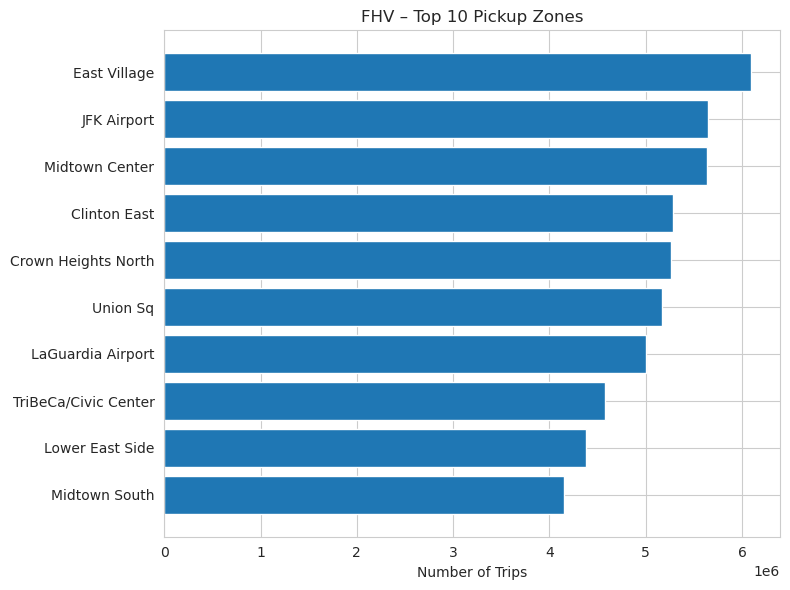

In [54]:
plot_top10(pickup_fhv, "num_trips", "zone", "FHV – Top 10 Pickup Zones")
# plot_choropleth(pickup_fhvhv, "num_trips", "FHVHV – Trips by Zone")


In [72]:
def plot_choropleth(df, column, title, cmap="viridis"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df.plot(column=column, cmap=cmap, legend=True, ax=ax, linewidth=0.3)
    plt.title(title)
    plt.axis("off")
    plt.show()


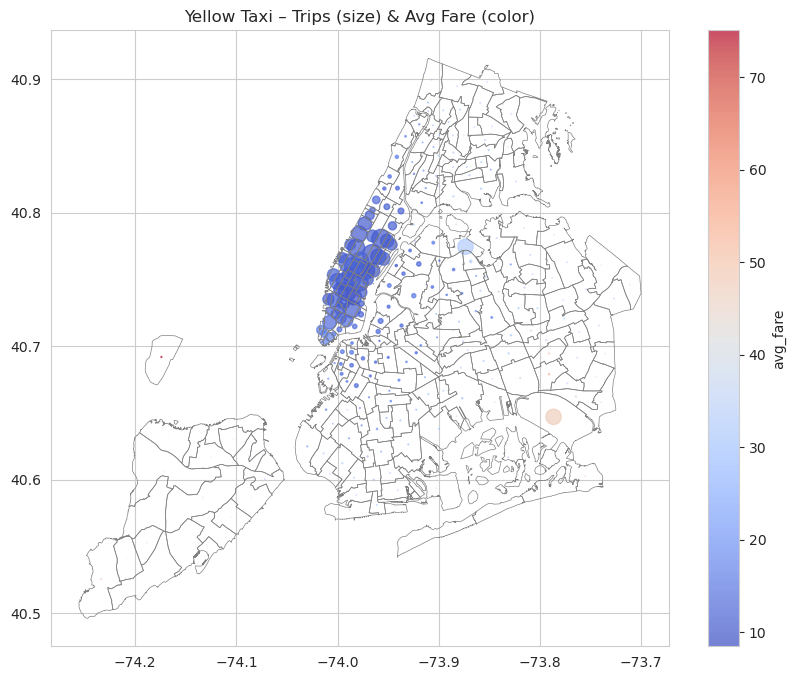

In [62]:
def plot_bubble_map(df, size_col="num_trips", color_col="avg_fare_amount", title=""):
    fig, ax = plt.subplots(figsize=(10,8))
    gdf.boundary.plot(ax=ax, linewidth=0.5, color="grey")
    sc = ax.scatter(df["longitude"], df["latitude"],
               s=df[size_col] / df[size_col].max() * 200,   # scale bubble sizes
               c=df[color_col], cmap="coolwarm", alpha=0.7)
    plt.colorbar(sc, label=color_col)
    plt.title(title)
    plt.savefig(f'/d/hpc/projects/FRI/bigdata/students/in7357/plots/{title}.pdf')
    plt.show()

plot_bubble_map(pickup_merged_yellow, "num_trips", "avg_fare", "Yellow Taxi – Trips (size) & Avg Fare (color)")

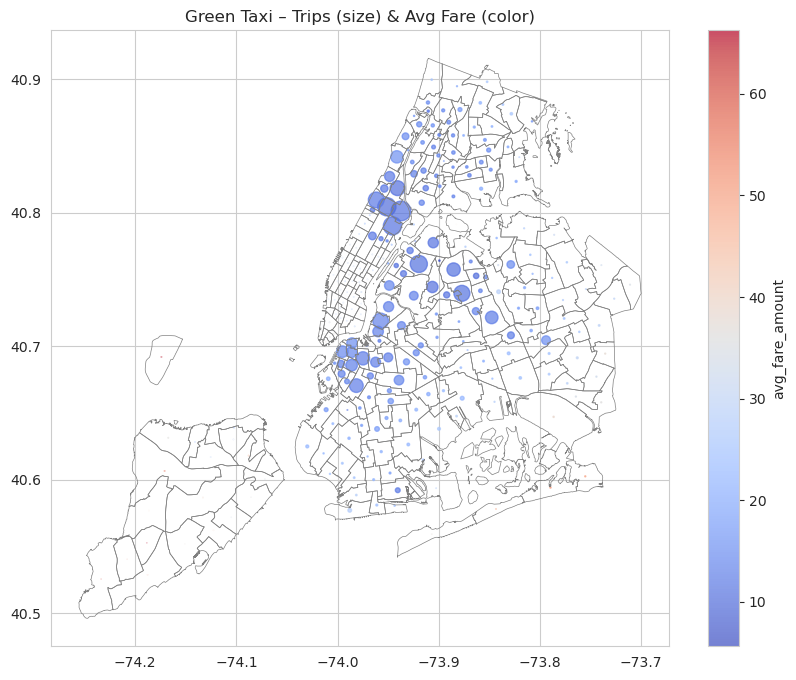

In [64]:
plot_bubble_map(pickup_green, "num_trips", "avg_fare_amount", "Green Taxi – Trips (size) & Avg Fare (color)")

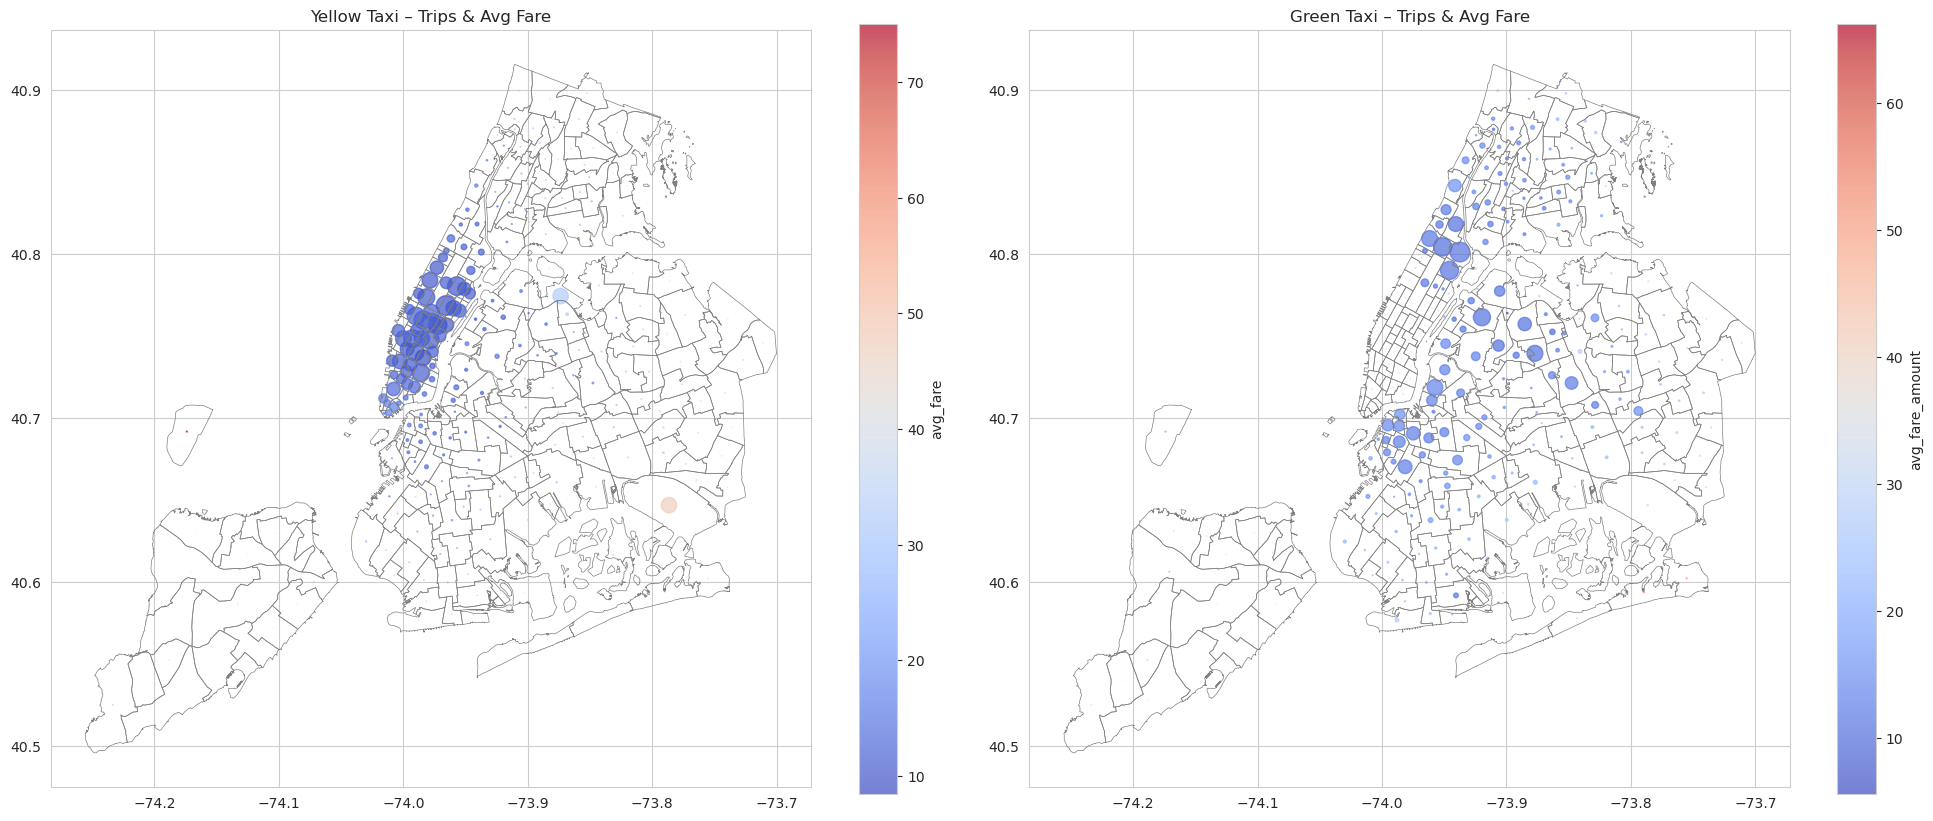

In [83]:
import matplotlib.pyplot as plt

def plot_bubble_maps_side_by_side(df1, df2, size_col1="num_trips", color_col1="avg_fare_amount",
                                  size_col2="num_trips", color_col2="avg_fare_amount",
                                  titles=("Plot 1", "Plot 2")):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns
    
    # First plot
    gdf.boundary.plot(ax=axes[0], linewidth=0.5, color="grey")
    sc1 = axes[0].scatter(df1["longitude"], df1["latitude"],
                          s=df1[size_col1] / df1[size_col1].max() * 200,
                          c=df1[color_col1], cmap="coolwarm", alpha=0.7)
    axes[0].set_title(titles[0])
    cbar1 = fig.colorbar(sc1, ax=axes[0])
    cbar1.set_label(color_col1)
    
    # Second plot
    gdf.boundary.plot(ax=axes[1], linewidth=0.5, color="grey")
    sc2 = axes[1].scatter(df2["longitude"], df2["latitude"],
                          s=df2[size_col2] / df2[size_col2].max() * 200,
                          c=df2[color_col2], cmap="coolwarm", alpha=0.7)
    axes[1].set_title(titles[1])
    cbar2 = fig.colorbar(sc2, ax=axes[1])
    cbar2.set_label(color_col2)
    
    plt.tight_layout()
    plt.savefig('/d/hpc/projects/FRI/bigdata/students/in7357/plots/combined_bubble_map.pdf')
    plt.show()

# Usage
plot_bubble_maps_side_by_side(
    pickup_merged_yellow, pickup_green,
    size_col1="num_trips", color_col1="avg_fare",
    size_col2="num_trips", color_col2="avg_fare_amount",
    titles=("Yellow Taxi – Trips & Avg Fare", "Green Taxi – Trips & Avg Fare")
)


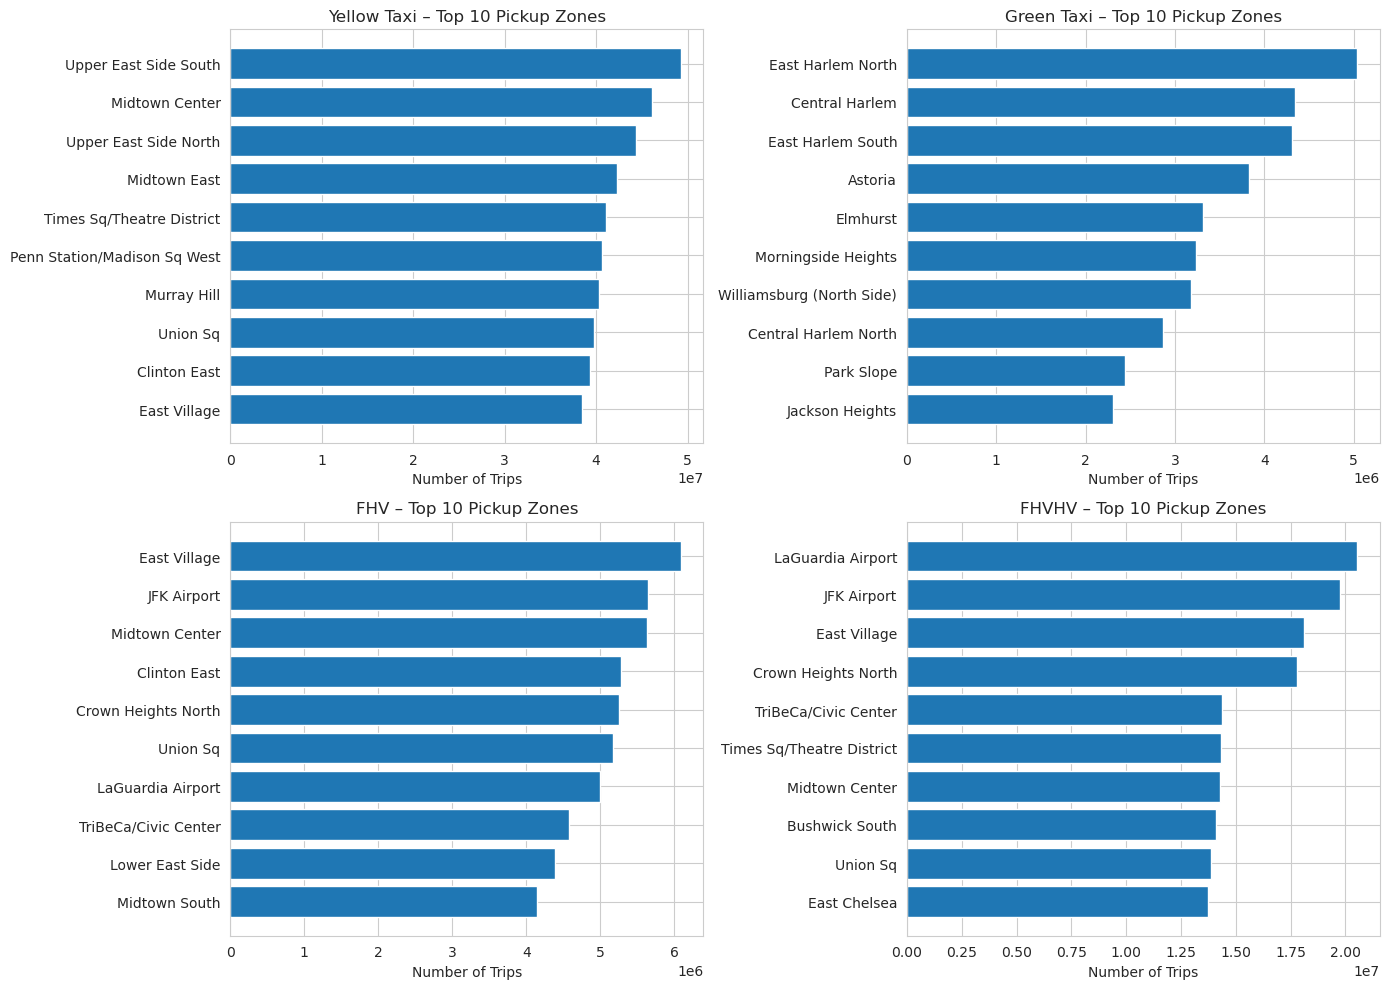

In [86]:
import matplotlib.pyplot as plt

datasets = [
    (pickup_yellow, "Yellow Taxi"),
    (pickup_green,  "Green Taxi"),
    (pickup_fhv,    "FHV"),
    (pickup_fhvhv,  "FHVHV")
]

fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()  # flatten 2x2 array for easy iteration

for ax, (df, name) in zip(axes, datasets):
    top10 = df.nlargest(10, "num_trips")
    ax.barh(top10["zone"], top10["num_trips"])
    ax.invert_yaxis()
    ax.set_title(f"{name} – Top 10 Pickup Zones")
    ax.set_xlabel("Number of Trips")
plt.tight_layout()
plt.savefig('/d/hpc/projects/FRI/bigdata/students/in7357/plots/pickup_combined.pdf')
plt.show()


In [77]:
pickup_year_yellow["dataset"] = "Yellow"
pickup_year_green["dataset"]  = "Green"
pickup_year_fhv["dataset"]    = "FHV"
pickup_year_fhvhv["dataset"]  = "FHVHV"

all_years = pd.concat([
    pickup_year_yellow,
    pickup_year_green,
    pickup_year_fhv,
    pickup_year_fhvhv
])

# Pivot: one row per year, columns = datasets
all_years_pivot = all_years.pivot(index="year", columns="dataset", values="trips").fillna(0)

# Compute relative trips (% of total trips)
all_years_relative = all_years_pivot.div(all_years_pivot.sum(axis=1), axis=0) * 100

/tmp/ipykernel_1940002/128805752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_year_yellow["dataset"] = "Yellow"


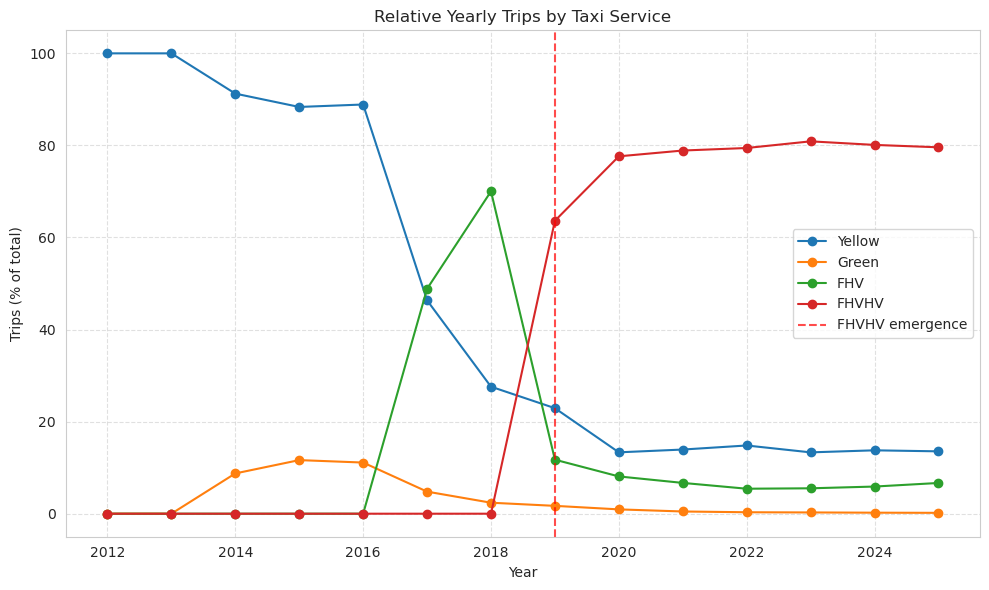

In [85]:
plt.figure(figsize=(10,6))

# Plot each service
for col in ["Yellow", "Green", "FHV", "FHVHV"]:
    plt.plot(all_years_relative.index, all_years_relative[col], marker="o", label=col)

# Add FHVHV emergence line
emergence_year = 2019
plt.axvline(x=emergence_year, color="red", linestyle="--", alpha=0.7, label="FHVHV emergence")

plt.title("Relative Yearly Trips by Taxi Service")
plt.xlabel("Year")
plt.ylabel("Trips (% of total)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig('/d/hpc/projects/FRI/bigdata/students/in7357/plots/UBER_INFLUENCE.pdf')
plt.show()


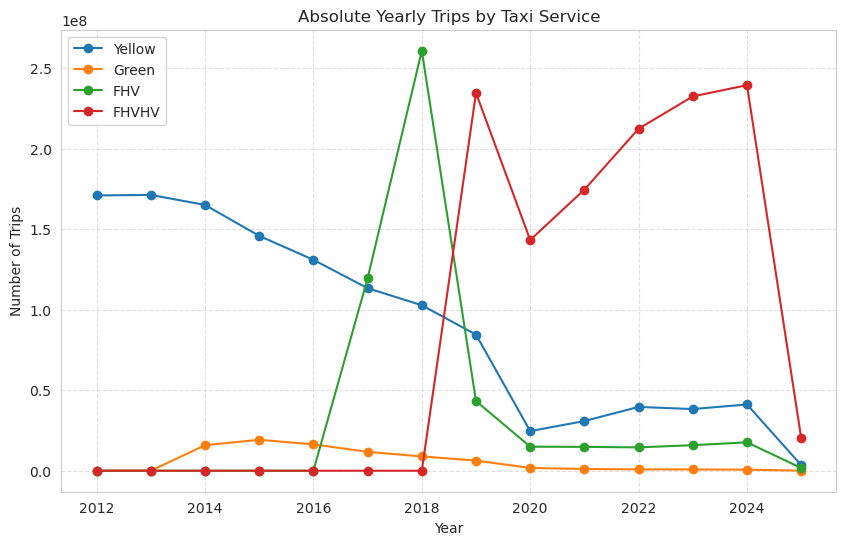

In [87]:
plt.figure(figsize=(10,6))
for col in ["Yellow", "Green", "FHV", "FHVHV"]:
    plt.plot(all_years_pivot.index, all_years_pivot[col], marker="o", label=col)
plt.title("Absolute Yearly Trips by Taxi Service")
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
